# Aprendizado de Máquina - Trabalho 1

Alunos: Alison Schemitt, Leonardo Faé, Rafael Almeida de Bem, Renata Delia,

### Imports

In [81]:
import random
from typing import Annotated, Protocol
from functools import partial

from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from numpy import ScalarType
from numpy.typing import ArrayLike
# Import only classification datasets
from sklearn.datasets import load_iris, load_wine
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, roc_auc_score)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier

datasets: list[tuple[ArrayLike, ...]] = [load_iris(return_X_y=True), load_wine(return_X_y=True)]
datasets_names = ["iris", "wine"]

### Funções auxiliares

In [82]:
# Código adaptado do GPT-4.
# Modificações:
# - Tipagem de parâmetros e retorno
def train_test_split_gpt(df: pd.DataFrame, test_size: int | float = 0.2) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Split the DataFrame into training and testing sets."""
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df


def multiclass_roc_auc_score_gpt(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


def get_generic_metrics(author: str, model: str, dataset: str, y_pred, y_test, _roc_auc_score, _print: bool = False) -> dict:
    if _roc_auc_score == None:
        return {
            'author': author,
            'model': model,
            'dataset': dataset,
        }
    
    if _print:
        print(f'{author} {model}: Dataset {dataset}')
        print(f'Accuracy: {accuracy_score(y_test, y_pred):.03}')
        print(f'F1: {f1_score(y_test, y_pred, average="macro"):.03}')
        print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.03}')
        print(f'Recall: {recall_score(y_test, y_pred, average="macro"):.03}')
        print(f'ROC AUC score: {_roc_auc_score:.03}')

    return {
        'author': author,
        'model': model,
        'dataset': dataset,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average="macro"),
        'precision': precision_score(y_test, y_pred, average="macro"),
        'recall': recall_score(y_test, y_pred, average="macro"),
        'roc_auc': _roc_auc_score,
    }

# Modelos

## Decision Tree

Prompt:
> Act as a machine learning engineer. Write a Python script that only uses NumPy and Pandas and implements the Decision Tree machine learning algorithm for classify a new instance of data based in a dataset. The code should be commented, complete, and generic.

GPT-4:
> Here is a sample implementation of the Decision Tree algorithm using NumPy and Pandas libraries in Python:
> 
> ```python
> import numpy as np
> import pandas as pd
> 
> class DecisionTree:
>     def __init__(self, max_depth=5):
>         self.max_depth = max_depth
> 
>     def fit(self, X, y):
>         self.tree = self.build_tree(X, y)
> 
>     def predict(self, X):
>         return np.array([self.traverse_tree(x, self.tree) for x in X])
> 
>     def build_tree(self, X, y, depth=0):
>         n_samples, n_features = X.shape
>         n_classes = len(np.unique(y))
> 
>         # Stopping criteria
>         if (depth >= self.max_depth or n_classes == 1 or n_samples < 2):
>             return np.argmax(np.bincount(y))
> 
>         # Find best split
>         best_feature, best_threshold = self.find_best_split(X, y)
> 
>         # Split data
>         left_idxs = X[:, best_feature] < best_threshold
>         right_idxs = ~left_idxs
>         left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
>         right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)
> 
>         # Create node
>         node = {'feature': best_feature,
>                 'threshold': best_threshold,
>                 'left': left_tree,
>                 'right': right_tree}
> 
>         return node
> 
>     def find_best_split(self, X, y):
>         n_samples, n_features = X.shape
>         best_gain = -1
>         best_feature = None
>         best_threshold = None
> 
>         for feature in range(n_features):
>             thresholds = np.unique(X[:, feature])
>             for threshold in thresholds:
>                 gain = self.gain(X, y, feature, threshold)
>                 if gain > best_gain:
>                     best_gain = gain
>                     best_feature = feature
>                     best_threshold = threshold
> 
>         return best_feature, best_threshold
> 
>     def gain(self, X, y, feature, threshold):
>         left_idxs = X[:, feature] < threshold
>         right_idxs = ~left_idxs
> 
>         if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
>             return 0
> 
>         left_y = y[left_idxs]
>         right_y = y[right_idxs]
> 
>         p_left = len(left_y) / len(y)
>         p_right = len(right_y) / len(y)
> 
>         entropy_before_split = self.entropy(y)
>         entropy_after_split = (p_left * self.entropy(left_y)
>                                + p_right * self.entropy(right_y))
> 
>         return entropy_before_split - entropy_after_split
> 
>     def entropy(self, y):
>         _, counts = np.unique(y, return_counts=True)
>         p_i = counts / len(y)
>         
>         return -np.sum(p_i * np.log2(p_i))
> 
>     def traverse_tree(self, x, node):
>         if isinstance(node, int):
>             return node
> 
>         if x[node['feature']] < node['threshold']:
>             return self.traverse_tree(x, node['left'])
>         
>         return self.traverse_tree(x, node['right'])
> ```
> 
> This implementation of the Decision Tree algorithm uses the `fit` method to train the model on the input data `X` and target labels `y`. The `predict` method can then be used to classify new instances of data based on the trained model. The `max_depth` parameter controls the maximum depth of the tree to prevent overfitting.
> 
> The `build_tree` method recursively constructs the decision tree by finding the best split at each node based on the information gain criterion. The `find_best_split` method searches over all possible splits for each feature and returns the one with the highest information gain. The `gain` method calculates the information gain for a given split. The `entropy` method calculates the entropy of a set of labels.
> 
> This implementation is generic and can be used with any dataset that can be loaded into a Pandas DataFrame.

Prompt:
> Why are you using entropy gain? why not use gini?

GPT-4:
> The Decision Tree algorithm can use different criteria to measure the quality of a split. In this implementation, **entropy** is used as the criterion for splitting the nodes of the tree¹. Entropy is a measure of information that indicates the disorder of the features with respect to the target¹. The optimum split is chosen by the feature with less entropy¹.
> 
> Another commonly used criterion is **Gini impurity**, which measures the frequency at which any element of the dataset will be mislabeled when it is randomly labeled¹. The Gini impurity is calculated using a different formula compared to entropy¹. The Gini Index has values inside the interval [0, 0.5], whereas the interval of entropy is [0, 1]¹. Both criteria have their own advantages and disadvantages.
> 
> The choice between entropy and Gini impurity depends on various factors, including the specific problem, dataset characteristics, and personal preference¹. In practice, both criteria can yield similar results¹. The gini criterion is generally faster because it is less computationally expensive, while the entropy criterion may provide slightly better results¹.
> 
> It's worth noting that this implementation uses entropy as a measure of information gain, but you can modify it to use Gini impurity or other criteria based on your specific requirements.
> 
> Let me know if there's anything else I can help you with!
> 
> Source: Conversation with Bing, 20/09/2023
> 1. Decision Trees: Gini vs Entropy | Quantdare. https://quantdare.com/decision-trees-gini-vs-entropy/.
> 2. ML | Gini Impurity and Entropy in Decision Tree - GeeksforGeeks. https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/.
> 3. Decision Tree with Gini index. If you don’t know about the Entropy .... https://purav-patel.medium.com/decision-tree-with-gini-index-4268f277817a.
> 4. When should I use Gini Impurity as opposed to Information Gain (Entropy)?. https://datascience.stackexchange.com/questions/10228/when-should-i-use-gini-impurity-as-opposed-to-information-gain-entropy.

In [83]:
import numpy as np
import pandas as pd

class GptDecisionTree:
    ### Inicialização da árvore, definindo a profundidade máxima.
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    ### Função para treinar o modelo.
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    ### Função para efetuar classificações após o modelo ter sido treinado.
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])

    ### Função para construir a árvore. Como critério de parada, o chatgpt escolheu
    ### ou a profundidade da árvore, ou número de classes = 1 (hardcoded),
    ### ou número de sample = 2 (harcoded).
    ### Ele busca a melhor divisão com uma função find_best_split, e faz uma
    ### chamada recursiva para montar o resto da árvore.
    ### Esta função está correta.
    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth or n_classes == 1 or n_samples < 2):
            return np.argmax(np.bincount(y))

        # Find best split
        best_feature, best_threshold = self.find_best_split(X, y)

        # Split data
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = ~left_idxs
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)

        # Create node
        node = {'feature': best_feature,
                'threshold': best_threshold,
                'left': left_tree,
                'right': right_tree}

        return node

    ### Função que encontra a melhor divisão deste nodo. Ela seleciona a melhor
    ### divisão com base em um critério "gain", que é calculado em outra função.
    ### A função está correta.
    def find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self.gain(X, y, feature, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    ### Este foi o critério usado pelo chatgpt para escolher como fazer as divisões dos nodos. 
    ### "Gain" é na verdade a diferença entre a entropia de antes e depois da divisão. Isso significa que o chatgpt está
    ### escolhendo divisões que minimizam entropia, pois a fórmula: entropy_before_split - entropy_after_split
    ### é maior quando 'entropy_after_split' é pequena, enquando a entropia antes da divisão é sempre a mesma.
    ### Essa lógica está correta.
    def gain(self, X, y, feature, threshold):
        left_idxs = X[:, feature] < threshold
        right_idxs = ~left_idxs

        if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
            return 0

        left_y = y[left_idxs]
        right_y = y[right_idxs]

        p_left = len(left_y) / len(y)
        p_right = len(right_y) / len(y)

        entropy_before_split = self.entropy(y)
        entropy_after_split = (p_left * self.entropy(left_y)
                               + p_right * self.entropy(right_y))

        return entropy_before_split - entropy_after_split

    ### Cálculo de entropia. O cálculo está correto.
    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        p_i = counts / len(y)
        
        return -np.sum(p_i * np.log2(p_i))

    ### Percorre a árvore recursivamente até encontrar um nodo folha, retornando a classe respectiva.

    ### O código original tinha um erro, pois testava isinstance(node, int), quando deveria testar 
    ### isinstance(node ScalarType).    
    def traverse_tree(self, x, node):
        ### Necessário mudar de int para ScalarType pois n ode nunca era int, mas int64. Com essa mudança, o código passou a inferir sem erros.
        if isinstance(node, ScalarType):
            return node

        if x[node['feature']] < node['threshold']:
            return self.traverse_tree(x, node['left'])

        
        return self.traverse_tree(x, node['right'])


In [84]:
for (x, y), dataset in zip(datasets, datasets_names):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print('SKLEARN: Dataset ', dataset)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred, average='macro'))
    print('Precision:', precision_score(y_test, y_pred, average='macro'))
    print('Recall:', recall_score(y_test, y_pred, average='macro'))
    print('ROC AUC score: ', roc_auc_score(y_test, tree.predict_proba(X_test), multi_class='ovr', average='micro'))

    print('-'*30)

    gpt_tree = GptDecisionTree()
    gpt_tree.fit(X_train, y_train)
    y_pred = gpt_tree.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred, average='macro'))
    print('Precision:', precision_score(y_test, y_pred, average='macro'))
    print('Recall:', recall_score(y_test, y_pred, average='macro'))
    print('ROC AUC score: ', multiclass_roc_auc_score_gpt(y_test, y_pred))

    print()


SKLEARN: Dataset  iris
Accuracy: 1.0
F1: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC score:  1.0
------------------------------
Accuracy: 1.0
F1: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC score:  1.0

SKLEARN: Dataset  wine
Accuracy: 0.9722222222222222
F1: 0.9777530589543938
Precision: 0.9777777777777779
Recall: 0.9791666666666666
ROC AUC score:  0.9791666666666669
------------------------------


Accuracy: 0.9444444444444444
F1: 0.9411799620132953
Precision: 0.9315476190476191
Recall: 0.9553571428571429
ROC AUC score:  0.9637896825396824



## KNN

Prompt:

> Act as a machine learning engineer. Write a Python script that only uses NumPy and Pandas and implements the KNN machine learning algorithm. The code should be commented, complete, and generic.

Resposta:

> Sure, here's a simple implementation of the K-Nearest Neighbors (KNN) algorithm using Python, NumPy, and Pandas. This script assumes that you have a dataset in a CSV file and that the last column of the dataset is the target variable.
> 
> ```python
> import numpy as np
> import pandas as pd
> from collections import Counter
> 
> # Load dataset
> def load_data(file_name):
>     """Load the CSV file and return a DataFrame."""
>     df = pd.read_csv(file_name)
>     return df
> 
> # Calculate Euclidean distance
> def euclidean_distance(row1, row2):
>     """Calculate the Euclidean distance between two vectors."""
>     distance = np.sqrt(np.sum((row1 - row2)**2))
>     return distance
> 
> # Get nearest neighbors
> def get_neighbors(train, test_row, num_neighbors):
>     """Get the most similar neighbors for a test instance."""
>     distances = list()
>     for index, train_row in train.iterrows():
>         dist = euclidean_distance(test_row[:-1], train_row[:-1])
>         distances.append((train_row, dist))
>     distances.sort(key=lambda tup: tup[1])
>     neighbors = list()
>     for i in range(num_neighbors):
>         neighbors.append(distances[i][0])
>     return neighbors
> 
> # Make a prediction
> def predict_classification(train, test_row, num_neighbors):
>     """Make a prediction with neighbors."""
>     neighbors = get_neighbors(train, test_row, num_neighbors)
>     output_values = [row[-1] for row in neighbors]
>     prediction = max(set(output_values), key=output_values.count)
>     return prediction
> 
> # Test the function
> def main():
>     """Load data, define number of neighbors and make a prediction."""
>     filename = 'your_file.csv'  # replace with your filename
>     df = load_data(filename)
>     num_neighbors = 3
>     # assuming we want to predict for the first row in the dataset
>     prediction = predict_classification(df, df.iloc[0], num_neighbors)
>     print('Expected %s, Got %s.' % (df.iloc[0][-1], prediction))
> 
> if __name__ == "__main__":
>     main()
> ```
> 
> Please replace `'your_file.csv'` with your actual file name. This script uses Euclidean distance to calculate the similarity between instances (rows) of data. The `get_neighbors` function retrieves the `num_neighbors` most similar instances for a given test instance. The `predict_classification` function makes a prediction based on those neighbors. The `main` function loads data from a CSV file, defines a number of neighbors, and makes a prediction for the first row in the dataset.
> 
> Remember to install any necessary libraries by running `pip install numpy pandas` in your terminal before executing this script.

Usuário:
> Your code doesn't consider every row, only the first one. Simulate Scikit-learn's implementation. Only send the updated code.

GPT-4:
> I understand your request. Here’s an updated version of the KNN algorithm that predicts for every row in the dataset, similar to Scikit-learn’s implementation:
>
> '''CODE'''
>
> This updated script makes a prediction for each row in the dataset by dropping the current row from the training set to avoid using it as its own neighbor. The predictions are stored in a list. Please replace 'your_file.csv' with your actual file name. Remember to install any necessary libraries by running pip install numpy pandas in your terminal before executing this script.

Usuário:
> You aren't dividing the dataset into two train/test datasets.

GPT-4:
> You’re right, I apologize for the oversight. Here’s the updated code that splits the dataset into a training set and a test set:
>
> '''CODE'''
>
> This script now uses train_test_split from sklearn.model_selection to split the dataset into a training set and a test set. The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing. The script then makes predictions for each row in the test set. Please replace 'your_file.csv' with your actual file name. Remember to install any necessary libraries by running pip install numpy pandas sklearn in your terminal before executing this script.

Usuário:
> Don't use sklearn. Remember what I said earlier

GPT-4:
> I apologize for misunderstanding your request earlier. Here’s the updated code that splits the dataset into a training set and a test set without using sklearn:
>
> '''CODE'''
>
> This script now uses a custom train_test_split function to split the dataset into a training set and a test set. The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing. The script then makes predictions for each row in the test set. Please replace 'your_file.csv' with your actual file name. Remember to install any necessary libraries by running pip install numpy pandas in your terminal before executing this script.

Usuário:
> Why are you importing Counter from collections? And you also aren't importing random to use its sample function. Also, explain in a few words the implementation of the predict_classification function.

GPT-4:
> You're correct, I apologize for the oversight. The `Counter` import is not necessary in this context, and the `random` module should indeed be imported to use its `sample` function. Here's the corrected import section:
> 
> ```python
> import numpy as np
> import pandas as pd
> import random
> ```
> 
> Regarding the `predict_classification` function, it works as follows:
> 
> 1. It calls the `get_neighbors` function to find the `num_neighbors` closest neighbors to the `test_row`.
> 2. It then extracts the output values (i.e., the classes or labels) of these neighbors.
> 3. Finally, it returns the most common output value among these neighbors as the prediction for the `test_row`. If there's a tie for the most common output value, it selects one of them arbitrarily.
> 
> This is a standard implementation of the K-Nearest Neighbors (KNN) algorithm, which classifies a data point based on how its neighbors are classified. The assumption is that similar data points (neighbors) have similar classifications. The number of neighbors considered (`num_neighbors`) is a hyperparameter that can be tuned for better performance.

Usuário:
> Give me a use-case to test this machine learning code

GPT-4:
> Sure, let's consider a use-case where we have a dataset of iris flowers. The dataset contains measurements of 150 iris flowers from three different species - Setosa, Versicolour, and Virginica. There are four features measured from each sample: the lengths and the widths of the sepals and petals.
> 
> You can download the dataset from the UCI Machine Learning Repository. Here is the link to the dataset: `https://archive.ics.uci.edu/ml/datasets/iris`. The data is in a `.data` file, which you can open as a CSV file.
> 
> Once you have downloaded the dataset, you can use it to test the KNN algorithm script. Replace `'your_file.csv'` in the script with the path to your downloaded iris dataset file. The script will then make predictions for each row in the test set (which is 20% of the data) based on the training set (which is 80% of the data).
> 
> The KNN algorithm will classify each flower in the test set based on its closest neighbors in the training set. The output will be a list of predicted species for each flower in the test set.
> 
> Please note that this is a simple implementation of KNN and may not give you the best accuracy as it doesn't include any data preprocessing steps like feature scaling or any parameter tuning. For more accurate results, consider using a machine learning library like scikit-learn which has optimized implementations of KNN and other algorithms.

Usuário:
> You may use sklearn datasets. Update your previous answer.

GPT-4:
> I apologize for the confusion. Here's the updated code that uses the iris dataset from `sklearn.datasets`:
> 
> ```python
> import numpy as np
> import pandas as pd
> import random
> from sklearn.datasets import load_iris
> 
> # Load dataset
> def load_data():
>     """Load the iris dataset and return a DataFrame."""
>     iris = load_iris()
>     df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
>                      columns= iris['feature_names'] + ['target'])
>     return df
> 
> # Calculate Euclidean distance
> def euclidean_distance(row1, row2):
>     """Calculate the Euclidean distance between two vectors."""
>     distance = np.sqrt(np.sum((row1 - row2)**2))
>     return distance
> 
> # Get nearest neighbors
> def get_neighbors(train, test_row, num_neighbors):
>     """Get the most similar neighbors for a test instance."""
>     distances = list()
>     for index, train_row in train.iterrows():
>         dist = euclidean_distance(test_row[:-1], train_row[:-1])
>         distances.append((train_row, dist))
>     distances.sort(key=lambda tup: tup[1])
>     neighbors = list()
>     for i in range(num_neighbors):
>         neighbors.append(distances[i][0])
>     return neighbors
> 
> # Make a prediction
> def predict_classification(train, test_row, num_neighbors):
>     """Make a prediction with neighbors."""
>     neighbors = get_neighbors(train, test_row, num_neighbors)
>     output_values = [row[-1] for row in neighbors]
>     prediction = max(set(output_values), key=output_values.count)
>     return prediction
> 
> # Split dataset into training set and test set
> def train_test_split(df, test_size):
>     """Split the DataFrame into training and testing sets."""
>     if isinstance(test_size, float):
>         test_size = round(test_size * len(df))
> 
>     indices = df.index.tolist()
>     test_indices = random.sample(population=indices, k=test_size)
> 
>     test_df = df.loc[test_indices]
>     train_df = df.drop(test_indices)
>     
>     return train_df, test_df
> 
> # Test the function
> def main():
>     """Load data, define number of neighbors and make a prediction for each row."""
>     
>     df = load_data()
>     
>     # split the dataset into training and testing sets
>     train_df, test_df = train_test_split(df, test_size=0.2)
>     
>     num_neighbors = 3
>     predictions = []
>     
>     # make a prediction for each row in the test set
>     for index, row in test_df.iterrows():
>         prediction = predict_classification(train_df, row, num_neighbors)
>         predictions.append(prediction)
>     
>     print('Predictions:', predictions)
> 
> if __name__ == "__main__":
>     main()
> ```
> 
> This script now uses `load_iris` from `sklearn.datasets` to load the iris dataset directly. The `load_data` function has been updated accordingly. The rest of the script remains the same. Please remember to install any necessary libraries by running `pip install numpy pandas sklearn` in your terminal before executing this script.

Usuário:
> How would you verify the predictions?

GPT-4:
> To verify the predictions, you would compare them with the actual labels from the test set. You can calculate the accuracy of the predictions by counting the number of correct predictions and dividing by the total number of predictions. Here’s how you can do it:
> 
> CODE
>
> This script now includes an accuracy_metric function that calculates the accuracy of the predictions. The main function has been updated to call this function after making predictions. It prints both the predictions and their accuracy. Please remember to install any necessary libraries by running pip install numpy pandas sklearn in your terminal before executing this script.

Usuário:
> I apologize for not having mentioned this earlier, but we're using a Jupyter notebook with every dependency already installed, so there's no need to remind me to install them every time.
> Having said that, create a new, self-contained "cell" that evaluates your previous code. Implement the following metrics: accuracy, recall, precision, f1-score, and ROC. These functions should be generic, as they will be used to evaluate further models as well.

GPT-4:
> Hmm…let’s try a different topic. Sorry about that. What else is on your mind?

Tentando mais uma vez...

> Sorry! That’s on me, I can’t give a response to that right now. What else can I help you with?

Parece que o GPT-4 perdeu o contexto da conversa.

> Sure, here's a Python code snippet that calculates the accuracy, recall, precision, F1-score, and ROC AUC score. This code assumes that you have two lists: `y_true` containing the true labels and `y_pred` containing the predicted labels.
> 
> ```python
> import numpy as np
> from sklearn import metrics
> 
> # True binary labels
> y_true = [0, 1, 1, 1, 0, 0]
> 
> # Predicted binary labels
> y_pred = [0, 0, 1, 1, 0, 1]
> 
> def calculate_metrics(y_true, y_pred):
>     # Accuracy
>     accuracy = metrics.accuracy_score(y_true, y_pred)
>     print(f'Accuracy: {accuracy}')
> 
>     # Recall
>     recall = metrics.recall_score(y_true, y_pred)
>     print(f'Recall: {recall}')
> 
>     # Precision
>     precision = metrics.precision_score(y_true, y_pred)
>     print(f'Precision: {precision}')
> 
>     # F1 Score
>     f1 = metrics.f1_score(y_true, y_pred)
>     print(f'F1 Score: {f1}')
> 
>     # ROC AUC Score
>     roc_auc = metrics.roc_auc_score(y_true, y_pred)
>     print(f'ROC AUC Score: {roc_auc}')
> 
> calculate_metrics(y_true, y_pred)
> ```
> 
> Please replace the `y_true` and `y_pred` lists with your actual data. The `calculate_metrics` function calculates and prints the five evaluation metrics. Note that these metrics are appropriate for binary classification problems. If you're working with multi-class classification problems, you might need to adjust the code accordingly.

In [85]:
import numpy as np
import pandas as pd
import random

### OBERVAÇÃO: COMENTÁRIOS QUE COMEÇAM COM TRÊS '###' SÃO DO GRUPO


### Função para carregar o dataset, ele coloca as features ao final dos dados.
### A função está correta, mas força as features que desejamos classificar a estarem na última coluna dos dados.
### Isso é consistente com as demais funções. Algumas delas simplesmente presumem que os dados estão nas últimas colunas.
# Load dataset
def load_data_knn_gpt(): ### renomeação nossa (load_data -> load_data_knn_gpt)
    """Load the iris dataset and return a DataFrame."""
    iris = load_iris()
    df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
    return df

### Função de calculo da distancia Euclidiana. A função está correta, desde que row1 e row2 sempre sejam vetores
### de mesmo tamanho (do mesmo set de dados)
# Calculate Euclidean distance
def euclidean_distance_knn_gpt(row1, row2): ### renomeação nossa (euclidean_distance -> euclidean_distance_knn_gpt)
    """Calculate the Euclidean distance between two vectors."""
    distance = np.sqrt(np.sum((row1 - row2)**2))
    return distance

### Função de seleção dos K vizinhos. A estratégia usada foi calcular a distância de todos, guardar em uma lista, ordernar a lista
### e selecionar os k primeiros elementos.
### Logicamente, a função está correta, mas a etapa de ordernação é custosa e desnecessária. Ela terá complexidade O(nlog(n)), quando
### uma estratégia mais inteligente poderia encontrar os k elementos menores com uma única passagem na lista de distâncias O(n)
### Além disso, ele assume que a classe é a última coluna, o que pode não funcionar sempre.
# Get nearest neighbors
def get_neighbors_knn_gpt(train, test_row, num_neighbors): ### renomeação nossa (get_neighbors -> get_neighbors_knn_gpt)
    """Get the most similar neighbors for a test instance."""
    distances = list()
    for index, train_row in train.iterrows():
        dist = euclidean_distance_knn_gpt(test_row[:-1], train_row[:-1])
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

### Função de inferência. Obtém os K vizinhos mais próximos através da função get_neighbors_knn_gpt, extrai as classes deles 
### e seleciona a classe com a maior ocorrência.
### A função está correta, porém, assim como em get_neighbors_knn_gpt, o modelo assume que as classes estão na última coluna
### o que pode não funcionar para todos os datasets.
# Make a prediction
def predict_classification_knn_gpt(train, test_row, num_neighbors): ### renomeação nossa (predict_classification -> predict_classification_knn_gpt)
    """Make a prediction with neighbors."""
    neighbors = get_neighbors_knn_gpt(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction


### Divide os datasets em treino e teste. A função está correta. É interessante que o ChatGPT resolveu aqui testar para garantir que test_size
### é um inteiro.
# Split dataset into training set and test set
def train_test_split_knn_gpt(df, test_size): ### renomeação nossa (train_test_split -> train_test_split_knn_gpt)
    """Split the DataFrame into training and testing sets."""
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

### Esta função foi modificada bastante por nós para nos auxiliar no teste do modelo. Ela devolve duas listas:
### uma com as predições, outra com as classes corretas. O ChatGPT em sí não está calculando acurácia ou outras métricas,
### mas com essas duas listas podemos efetuar os cálculos nós mesmos. O único problema desta função é o hardcoded num_neighbors.
### O ideal seria que isso fosse um parâmetro da função, para que pudéssemos chamá-la facilmente com vários 'K's.
# Test the function
def knn_gpt(train_df, test_df): ### renomeação nossa (main -> knn_gpt), inclusão de parâmetros tb
    """Load data, define number of neighbors and make a prediction for each row."""

    # df = load_data_knn_gpt()

    # # split the dataset into training and testing sets
    # train_df, test_df = train_test_split(df, test_size=0.2)
    
    num_neighbors = 3
    predictions = []
    truth = []
    
    # make a prediction for each row in the test set
    for index, row in test_df.iterrows():
        prediction = predict_classification_knn_gpt(train_df, row, num_neighbors)
        predictions.append(prediction)
        truth.append(row[-1])
    
    ### print('Predictions:', predictions) ### remoção nossa
    
    return predictions, truth ### adição nossa

if __name__ == "__main__": ### atualizações nossas
    df = load_data_knn_gpt()

    # split the dataset into training and testing sets
    train_df, test_df = train_test_split_knn_gpt(df, test_size=0.2)
    knn_gpt(train_df, test_df)

## Naive Bayes

Prompt:
> Act as a machine learning engineer. Write a Python script that only uses NumPy and Pandas and implements the Naive Bayes machine learning algorithm for classify a new instance of data based in a dataset. The code should be commented, complete, and generic.

GPT-4:
> Sure! Here's a Python script that uses **NumPy** and **Pandas** to implement the **Naive Bayes** machine learning algorithm for classifying a new instance of data based on a dataset. The code is commented, complete, and generic:
> 
> ```python
> import numpy as np
> import pandas as pd
> 
> class NaiveBayes:
>     def __init__(self):
>         self.prior = {}
>         self.likelihood = {}
>         self.classes = []
>         
>     def fit(self, X, y):
>         self.classes = np.unique(y)
>         for c in self.classes:
>             X_c = X[y == c]
>             self.prior[c] = len(X_c) / len(X)
>             self.likelihood[c] = (X_c.sum(axis=0) + 1) / (X_c.sum() + X.shape[1])
>             
>     def predict(self, X):
>         predictions = []
>         for x in X:
>             posteriors = []
>             for c in self.classes:
>                 prior = np.log(self.prior[c])
>                 likelihood = np.log(self.likelihood[c]).sum()
>                 posterior = prior + likelihood
>                 posteriors.append(posterior)
>             predictions.append(self.classes[np.argmax(posteriors)])
>         return predictions
> 
> # Example usage
> X_train = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [0, 1, 0, 1]})
> y_train = pd.Series([0, 0, 1, 1])
> 
> X_test = pd.DataFrame({'feature1': [3], 'feature2': [0]})
> 
> model = NaiveBayes()
> model.fit(X_train.values, y_train.values)
> predictions = model.predict(X_test.values)
> 
> print(predictions)
> ```
> 
> Please note that this is a basic implementation of the Naive Bayes algorithm using NumPy and Pandas. You may need to modify it to suit your specific needs and dataset.
> 
> Let me know if you need any further assistance!

Prompt:
> explain the likelihood calculation

GPT-4:
> The **likelihood calculation** in the Naive Bayes algorithm is used to estimate the probability of observing a particular feature value given a class. It is calculated as follows:
> 
> 1. For each class, the algorithm counts the occurrences of each feature value in the training dataset.
> 2. It then adds **1** to each count to avoid **zero probabilities** when calculating the likelihood.
> 3. The counts are divided by the sum of all feature occurrences for that class plus the number of unique feature values.
> 4. The resulting values represent the likelihood of observing each feature value given a class.
> 
> In the provided code, the likelihood calculation is performed using NumPy and Pandas. The `fit` method calculates the prior probabilities and likelihoods for each class based on the training dataset. The `predict` method uses these probabilities and likelihoods to make predictions for new instances.
> 
> You can find more information about Naive Bayes and its likelihood calculation in the references below:
> 
> - [Naive Bayes classifier - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
> - [Naive Bayes Classifier Explained](https://towardsdatascience.com/naive-bayes-classifier-explained-9d1d8f01b7b)
> - [Naive Bayes Classifier from Scratch in Python](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)
> 
> Let me know if there's anything else I can help you with!

In [86]:
import numpy as np
import pandas as pd

class GptNaiveBayes:
    def __init__(self):
        self.prior = {}
        self.likelihood = {}
        self.classes = []
        
    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y == c]
            self.prior[c] = len(X_c) / len(X)
            self.likelihood[c] = (X_c.sum(axis=0) + 1) / (X_c.sum() + X.shape[1])
            
    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.prior[c])
                likelihood = np.log(self.likelihood[c]).sum()
                posterior = prior + likelihood
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return predictions

# Example usage
X_train = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [0, 1, 0, 1]})
y_train = pd.Series([0, 0, 1, 1])

X_test = pd.DataFrame({'feature1': [3], 'feature2': [0]})

model = GptNaiveBayes()
model.fit(X_train.values, y_train.values)
predictions = model.predict(X_test.values)

print(predictions)


[0]


# Análise dos resultados

Aqui comparamos os modelos escritos pelo GPT-4 com os modelos disponibilizados pela biblioteca scikit-learn.
Os modelos da biblioteca scikit-learn não estão com seus parâmetros modificados, salvo para paridade com o código do GPT-4.

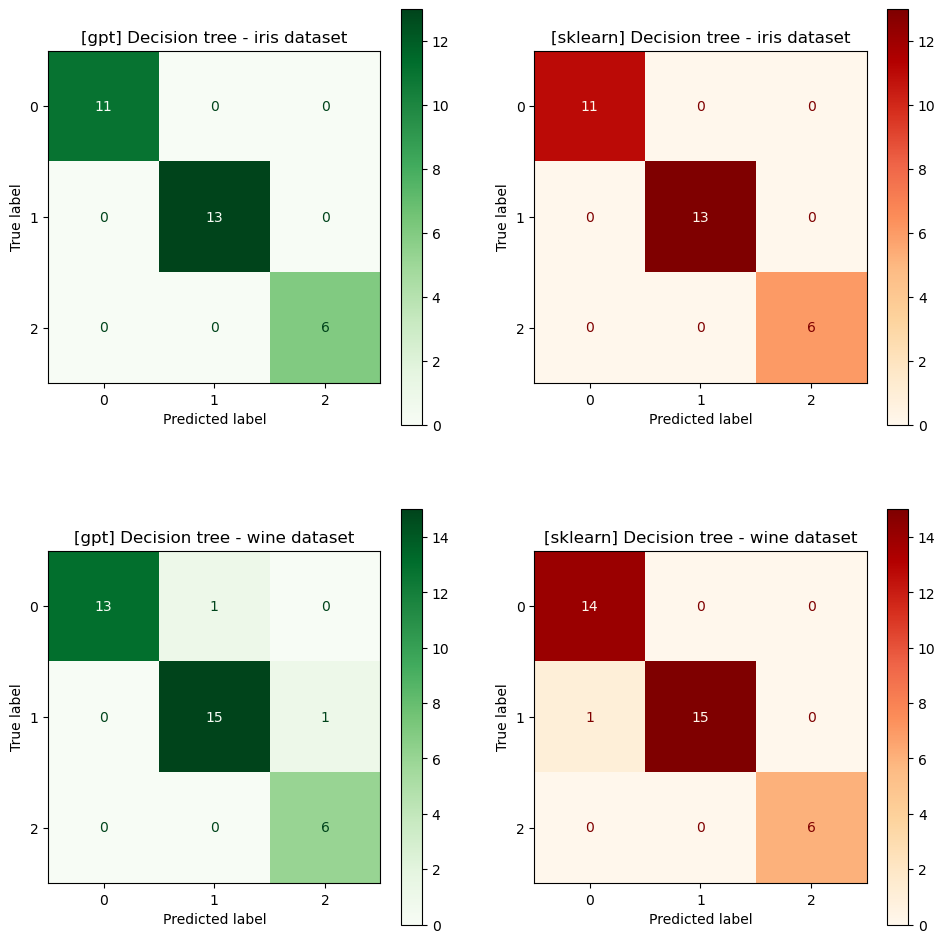

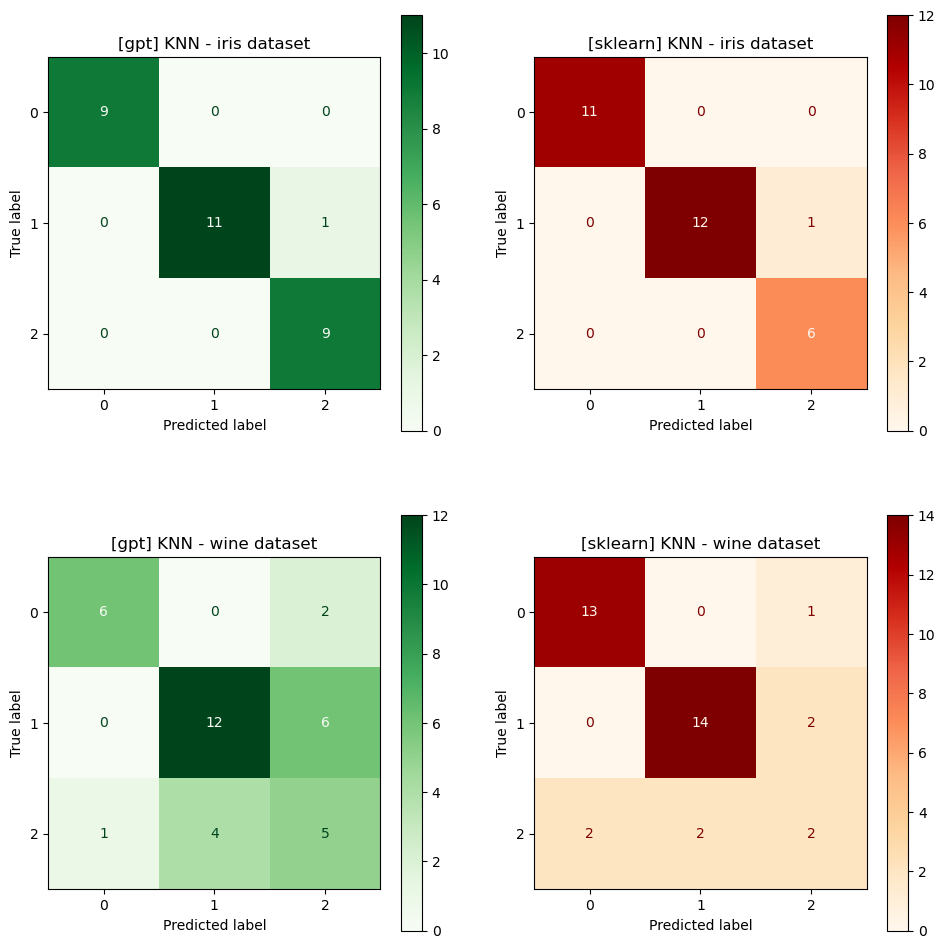

/home/debem/mambaforge/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/debem/mambaforge/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


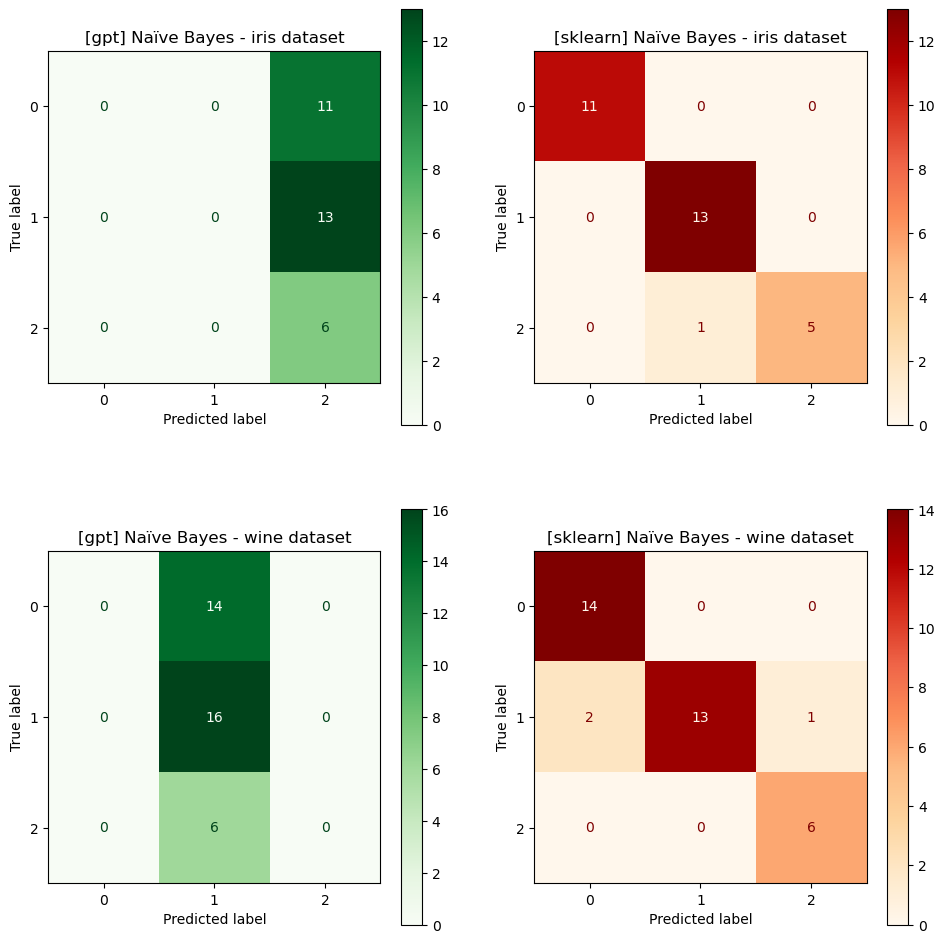

In [87]:
ModelResult = Annotated[tuple[ArrayLike, ArrayLike, ScalarType], 'Model results as (y_pred, y_test, roc_auc_score)']

class Model(Protocol):
    def fit(self, X: ArrayLike, y: ArrayLike): ...
    def predict(self, X: ArrayLike) -> ArrayLike: ...


def generic_split_fit_predict(model_cls: type[Model], x: ArrayLike, y: ArrayLike, /, seed=0, test_size=0.2) -> ModelResult:
    """Generic function that splits a (X, y) dataset, fits a model to it, and runs a prediction.

    Args:
        model_cls (type[Model]): Class type that's compatible with the Model protocol
        X (ArrayLike): Unlabeled dataset
        y (ArrayLike): Dataset labels
        seed (int, optional): Passed to `random_state` and `random.seed`. Defaults to 0.
        test_size (float, optional): Paased to `train_test_split`. Defaults to 0.2.

    Returns:
        ModelResult: Model results as (y_pred, y_test, roc_auc_score)
    """
    random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    model = model_cls()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if (predict_proba := getattr(model, 'predict_proba', None)) != None:
        _roc_auc_score = roc_auc_score(y_test, predict_proba(X_test), multi_class='ovr', average='micro')
    else:
        _roc_auc_score = multiclass_roc_auc_score_gpt(y_test, y_pred)

    return y_pred, y_test, _roc_auc_score


def gpt_knn(x, y) -> ModelResult:
    """GPT's implementation of KNN.

    This function is only a wrapper for GPT-4's implementation.
    Sadly, GPT-4's code doesn't follow the traditional train/test split contract,
    this is why we receice (X, y) and cast them into a dataframe, only to split
    it using their `train_test_split_knn_gpt` function.
    """
    res = list()
    for i, l in enumerate(x):
        res.append(list(l) + [y[i]])

    df = pd.DataFrame(data=res, columns=(f'col_{i}' for i in range(len(res[0]))))

    # split the dataset into training and testing sets using gpt's function for completion
    random.seed(0)
    train_df, test_df = train_test_split_knn_gpt(df, test_size=0.2)
    y_pred, y_test = knn_gpt(train_df, test_df)

    return y_pred, y_test, multiclass_roc_auc_score_gpt(y_test, y_pred)


models = {
    'Decision tree': {
        'gpt': GptDecisionTree,
        'sklearn': DecisionTreeClassifier,
    },
    'KNN': {
        'gpt': gpt_knn,
        'sklearn': KNeighborsClassifier,
    },
    'Naïve Bayes': {
        'gpt': GptNaiveBayes,
        'sklearn': GaussianNB,
    },
}

colors = ['Greens', 'OrRd']
model_results: list[dict] = list()
for model_name, model_impl in models.items():
    fig, axes = plt.subplots(nrows=len(datasets), ncols=2, figsize=(10, 10))
    fig.tight_layout(pad=2, h_pad=4)

    for i, ((x, y), dataset) in enumerate(zip(datasets, datasets_names)):
        for j, (author, implementation) in enumerate(model_impl.items()):
            if isinstance(implementation, type):
                implementation = partial(generic_split_fit_predict, implementation)

            y_pred, y_test, _roc_auc_score = implementation(x, y)
            model_results.append(get_generic_metrics(author, model_name, dataset, y_pred, y_test, _roc_auc_score))
            cm = confusion_matrix(y_test, y_pred)
            display_confusion_matrix = ConfusionMatrixDisplay(cm)
            display_confusion_matrix.plot(ax=axes[i][j], cmap=colors[j])
            axes[i][j].set_title(f'[{author}] {model_name} - {dataset} dataset')
    display(fig)

plt.close('all')
res_df = pd.DataFrame.from_records(model_results)

In [89]:
res_df

,author,model,dataset,accuracy,f1,precision,recall,roc_auc
0,gpt,Decision tree,iris,1.000000,1.000000,1.000000,1.000000,1.000000
1,sklearn,Decision tree,iris,1.000000,1.000000,1.000000,1.000000,1.000000
2,gpt,Decision tree,wine,0.944444,0.941180,0.931548,0.955357,0.963790
3,sklearn,Decision tree,wine,0.972222,0.977753,0.977778,0.979167,0.979167
4,gpt,KNN,iris,0.966667,0.967963,0.966667,0.972222,0.978175
5,sklearn,KNN,iris,0.966667,0.961026,0.952381,0.974359,0.999444
6,gpt,KNN,wine,0.638889,0.646888,0.663919,0.638889,0.725173
7,sklearn,KNN,wine,0.805556,0.711729,0.713889,0.712302,0.892747
8,gpt,Naïve Bayes,iris,0.200000,0.111111,0.066667,0.333333,0.500000
9,sklearn,Naïve Bayes,iris,0.966667,0.957351,0.976190,0.944444,0.999444
